# Average Bubble

In [1]:
from bubble_tools_vac import *
from experiment_vac import *


In [2]:
get_vels = False
get_avBubble = False


In [4]:
minSim = 0
maxSim = 2000
maxvel = 0.4

for tmp in [2]:#[0,1,2]:

    ph0      = phi0List[tmp]
    sigmafld = fluct_stdev(m2eff, ph0, temp)
    ampList  = np.linspace(phieq + 2.8*sigmafld, phieq + 5.*sigmafld, 20)
    print('Round parameters:', temp, ph0, sigmafld)

    win         = 75
    plots       = True
    critSize    = 30
    threshSize  = ampList[-1]
    print('Average bubble params:', win, critSize, threshSize)

    if get_vels:
        all_vels = []
        for sim in range(minSim, maxSim):
            loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
            if os.path.exists(loc_rest_bub):
                sim, real, totalvCOM, finalv = np.load(loc_rest_bub)
                if np.isnan(totalvCOM) or np.isnan(finalv):
                    print('sim', sim, 'must be removed', totalvCOM, finalv)
                all_vels.append(totalvCOM)

        print('Total bubbles included:', len(all_vels))
        np.save(velocities_bubbles_file(nLat, lamb, ph0, temp), np.asarray(all_vels))
        print('Velocities saved.')

    if get_avBubble:
        all_data1, all_data2 = [], []
        for sim in range(minSim, maxSim):
            loc_rest_bub = bubble_at_rest(nLat, lamb, ph0, temp, sim)+'.npy'
            if os.path.exists(loc_rest_bub):
                sim, real, totalvCOM, finalv = np.load(loc_rest_bub)

                all_data1.append(np.asarray([real, totalvCOM, sim]))
  #              if np.abs(totalvCOM) < maxvel:
  #                  all_data2.append(np.asarray([real, totalvCOM, sim]))

        print('Total bubbles included:', len(all_data1), len(all_data2))
        all_data1 = np.asarray(all_data1)
        all_data2 = np.asarray(all_data2)

        typex = 2 # this is a must
        stacks  = stack_bubbles(all_data1, plots, win, phieq, threshSize, critSize, typex)
        stacks  = average_stacks(stacks, plots, normal)
        avstack = average_bubble_stacks(stacks)
        np.save(average_bubble_file(nLat, lamb, ph0, temp), avstack)
        print('Average bubble saved.')

  #      stacks  = stack_bubbles(all_data2, plots, win, phieq, threshSize, critSize, typex)
  #      stacks  = average_stacks(stacks, plots, normal)
  #      avstack = average_bubble_stacks(stacks)
  #      np.save(average_bubble_file(nLat, lamb, ph0, temp)+'_velmax'+str(maxvel), avstack)
  #      print('Average bubble saved.')


NameError: name 'nTimeMax' is not defined

In [4]:
bubbleList = []

for tmp in [0,1,2]:
    ph0      = phi0List[tmp]
    print('Round parameters:', temp, ph0)

    bubbleList.append(np.load(average_bubble_file(nLat, lamb, ph0, temp)+'.npy'))
  #  bubbleList.append(np.load(average_bubble_file(nLat, lamb, ph0, temp)+'_velmax'+str(maxvel)+'.npy'))


Round parameters: 0.12 1.5707963267948966 30000
Round parameters: 0.1 1.5707963267948966 30000
Round parameters: 0.08 1.5707963267948966 30000


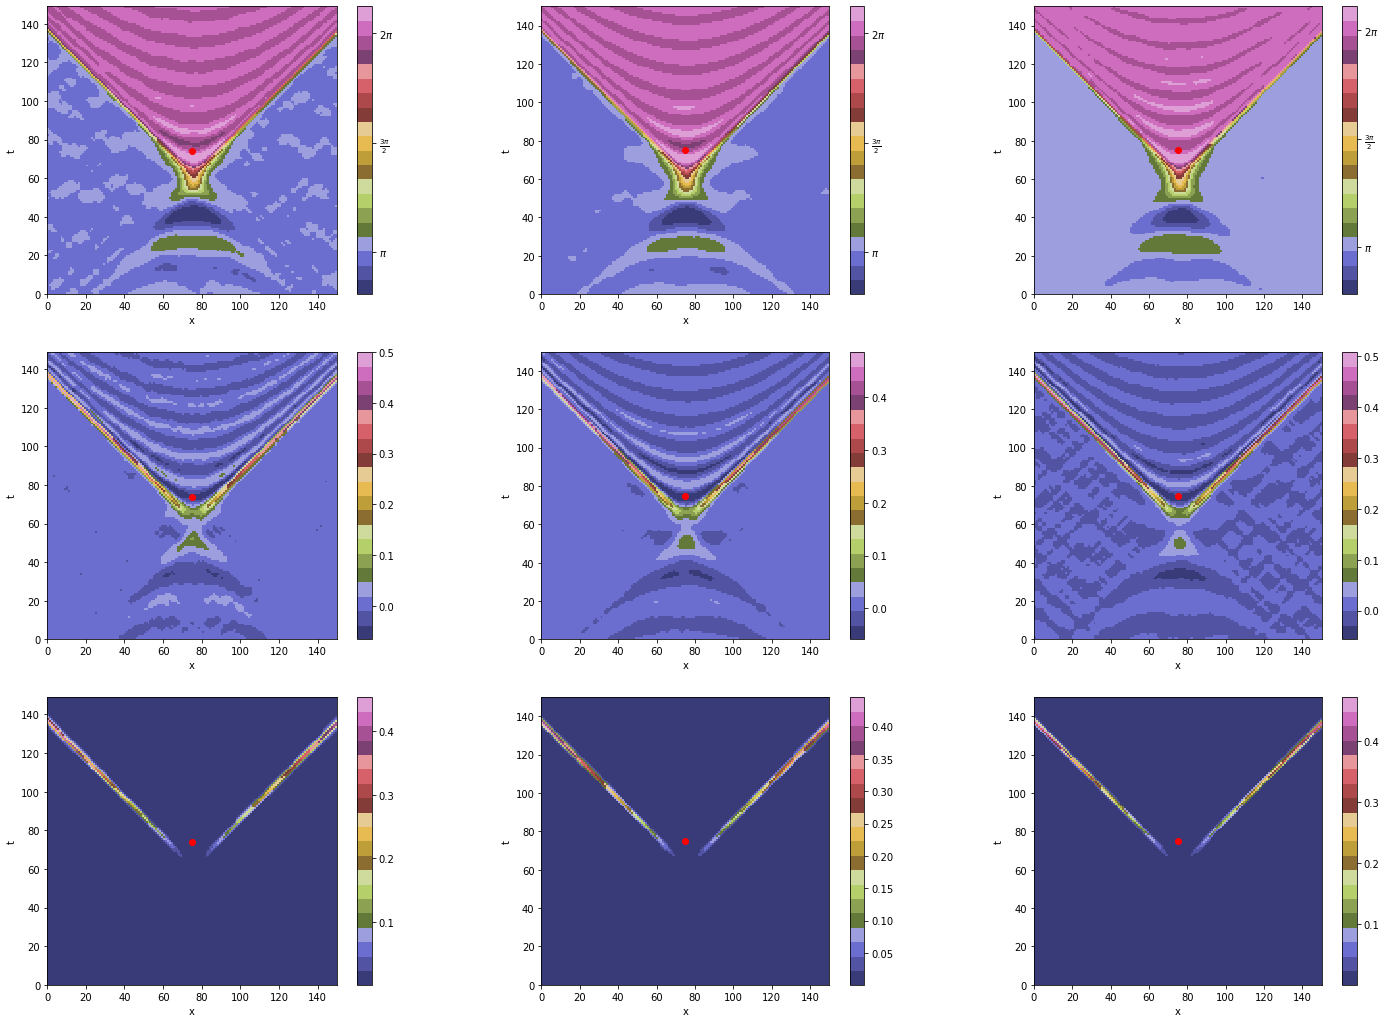

In [5]:
win = 75
tp = 0 # 0 for average, 1 for error
fig, ax = plt.subplots(3, len(bubbleList), figsize = (25, 18))
for ii, average_bubble in enumerate(bubbleList):

    nT, nN  = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)
    tl, tr        = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr        = max(0, xcen-win), min(nN-1, xcen+win)

    ext = [xl,xr,tl,tr]
    bubble2plot = average_bubble[tp,0][tl:tr,xl:xr]
    im0 = ax[0,ii].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb0 = plt.colorbar(im0, ax = ax[0,ii])
    clb0.locator     = matplotlib.ticker.MultipleLocator(np.pi/2)
    clb0.formatter   = matplotlib.ticker.FuncFormatter(multiple_formatter())
    clb0.update_ticks()

    bubble2plot = average_bubble[tp,1][tl:tr,xl:xr]
    im1 = ax[1,ii].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb1 = plt.colorbar(im1, ax = ax[1,ii])

    bubble2plot = average_bubble[tp,2][tl:tr,xl:xr]
    im2 = ax[2,ii].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb2 = plt.colorbar(im2, ax = ax[2,ii])

    for aa, axx in enumerate(ax[:,ii]):
        axx.plot(xcen,tcen,'ro')
        axx.set_xlabel('x')
        axx.set_ylabel('t')
        axx.grid(False)
plt.savefig('./data/average_bubbles_comparison.pdf', format='pdf', dpi=5000, rasterize='True')
plt.show()


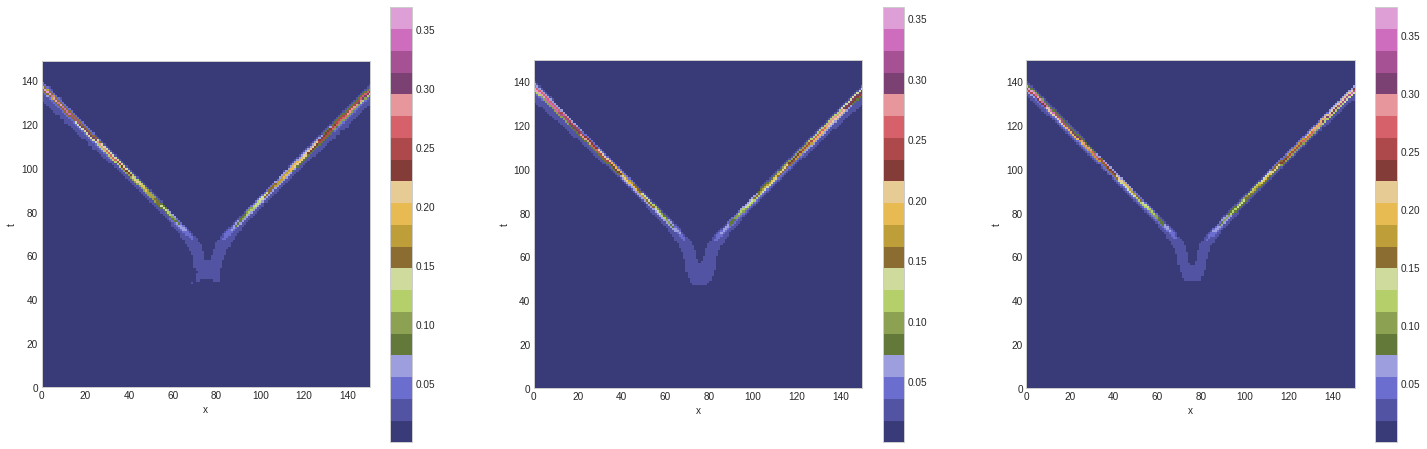

In [9]:
fig, ax = plt.subplots(1, len(bubbleList), figsize = (25, 8))
for ii, average_bubble in enumerate(bubbleList):

    #total energy should be:
    # note: multiply column 2 by 0.5 if thermal
    kinetic   = 0.5*average_bubble[0,1]**2.
    gradient  = 0.5*average_bubble[0,2]
    potential = - V(average_bubble[0,0])

    totEbubble = kinetic + gradient + potential
#    totEbubble = totEbubble[50:80,50:-50]
    totEbubble = totEbubble

    nT, nN = np.shape(average_bubble[0,0])
    tcen, xcen = find_nucleation_center2(average_bubble[0,0], phieq, threshSize, critSize)
    tl, tr = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr = max(0, xcen-win), min(nN-1, xcen+win)
    ext = np.asarray([xl,xr,tl,tr])#*dx

    bubble2plot = np.log(totEbubble[tl:tr,xl:xr])
    bubble2plot = totEbubble[tl:tr,xl:xr]
    #ax[ii].axhline(indmin, color='red', ls='-.')
    im0 = ax[ii].imshow(bubble2plot, interpolation='none', extent=ext, origin='lower', cmap='tab20b')
    clb0 = plt.colorbar(im0, ax = ax[ii])

    ax[ii].set_xlabel('x')
    ax[ii].set_ylabel('t')
    ax[ii].grid(False)
plt.savefig('./data/average_bubble_energies.pdf', format='pdf', dpi=5000, rasterize='True')
#plt.savefig('./data/average_bubble_energy'+str('%.4f'%temp)+'.pdf', format='pdf', dpi=5000, rasterize='True')
plt.show()


In [10]:
# Critical bubble; expectation
eden = (V(2.*np.pi)-V(np.pi))
phiL = np.linspace(np.pi, 2*np.pi,1000)
surf = np.trapz(np.sqrt(-2.*V(phiL)), phiL)
rsph = surf/eden
Esph = 2.*eden*rsph
rsph = rsph/dx
print('energy density, critical radius, surface density, total energy')
print(eden, rsph, surf, Esph)



energy density, critical radius, surface density, total energy
0.016 9.41041221135442 0.4649740048272157 0.9299480096544314


81
81 3.0891376213693897 0.9255558281784609 42
103
103 2.2816074463305784 0.9262342831194464 85
108
108 2.160274906412196 0.9320991375321603 94


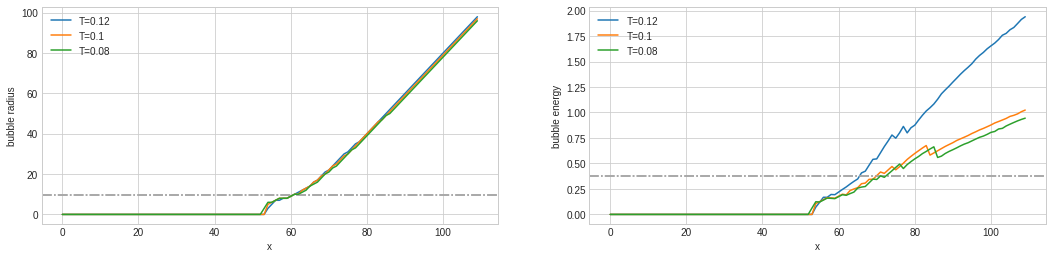

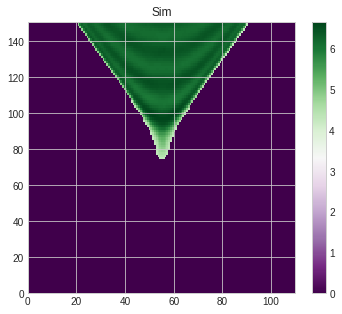

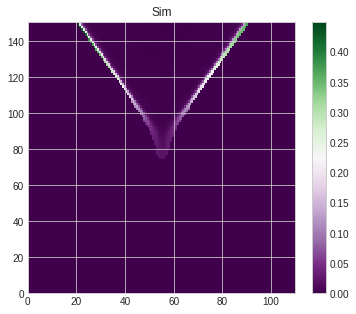

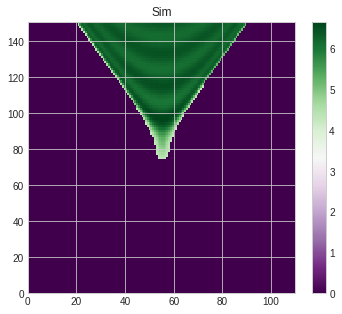

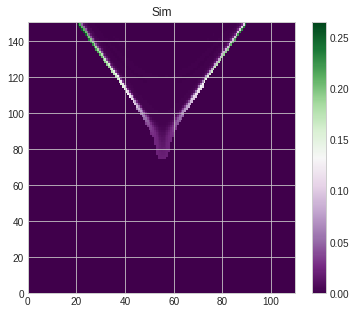

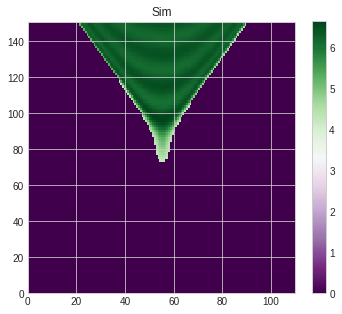

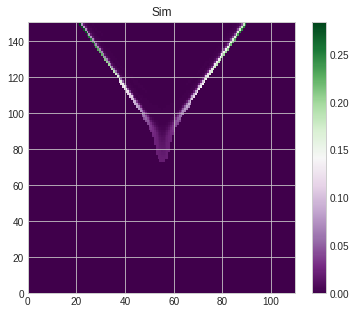

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))
for ii, average_bubble in enumerate(bubbleList):
 #   if ii==0: continue

    bubbele = average_bubble[:,:,:110]
    #total energy should be:
    # note: multiply column 2 by 0.5 if thermal
    kinetic   = 0.5*bubbele[0,1]**2.
    if ii==0:
        gradient  = bubbele[0,2]
    else:
        gradient  = 0.5 * bubbele[0,2]
    potential = - V(bubbele[0,0])

    totEbubble = kinetic + gradient + potential


    #print(np.shape(totEbubble))
    #plt.plot(np.sum(totEbubble, axis=1), label='Tot energy')
    #plt.legend(); plt.show()

    bubblethresh = ampList[-1]
    bubblecoords = bubbele[0,0,:,:]>bubblethresh
    bubbleprint = bubbele[0,0,:,:]*bubblecoords
    bubbleenergyprint = totEbubble*bubblecoords

    countrad = np.count_nonzero(bubbleprint, axis=1)
    ax[0].axhline(rsph, ls='-.', color='darkgray')
    ax[0].plot(countrad, label='T='+str(Tlist[ii]))

    ax[1].axhline(Esph/ph0**2., ls='-.', color='darkgray')
    count = np.sum(bubbleenergyprint, axis=1)
    ax[1].plot(count, label='T='+str(Tlist[ii]))
 
    ax[0].set_xlabel('x'); ax[0].set_ylabel('bubble radius')
    ax[1].set_xlabel('x'); ax[1].set_ylabel('bubble energy')

    indmin = np.argmin(np.abs(count-Esph))
    print(indmin)
    slice = totEbubble[indmin,:]
    Eemp = count[indmin]
    Remp = countrad[indmin]
    print(indmin, np.sum(slice), Eemp, Remp)
for axx in ax: axx.legend()
plt.show()

for ii, average_bubble in enumerate(bubbleList):
 #   if ii==0: continue

    bubbele = average_bubble[:,:,:110]
    #total energy should be:
    # note: multiply column 2 by 0.5 if thermal
    kinetic   = 0.5*bubbele[0,1]**2.
    if ii==0:
        gradient  = bubbele[0,2]
    else:
        gradient  = 0.5 * bubbele[0,2]
    potential = - V(bubbele[0,0])

    totEbubble = kinetic + gradient + potential

    bubblethresh = ampList[-1]
    bubblecoords = bubbele[0,0,:,:]>bubblethresh
    bubbleprint = bubbele[0,0,:,:]*bubblecoords
    bubbleenergyprint = totEbubble*bubblecoords

    nN,nT = np.shape(bubbele[0,0])
    simple_imshow(bubbleprint, [0,nN,0,nT])
    simple_imshow(bubbleenergyprint, [0,nN,0,nT])


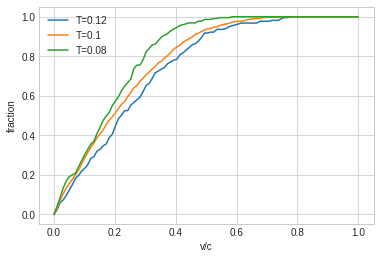

In [12]:
for tmp, temp in enumerate(Tlist[:3]):
    ph0 = phi0List[tmp]

    all_vels = np.load(velocities_bubbles_file(nLat, lamb, ph0, temp)+'.npy')
    all_vels = np.abs(all_vels)
    #vlist = np.linspace(-1,1,100)
    vlist = np.linspace(0.,1,100)
    fraction = [len(all_vels[all_vels<ii])/len(all_vels) for ii in vlist]
    plt.plot(vlist, fraction, label='T='+str(temp))
plt.xlabel('v/c'); plt.ylabel('fraction')
plt.legend(); plt.show()


0.1 0.12 0.9299480096544314 0.3234122078453343 0.3230388018189215
0.1 0.1 0.9299480096544314 0.29523360268239807 0.294892731176107
0.1 0.08 0.9299480096544314 0.26406496193600254 0.26376007719213873


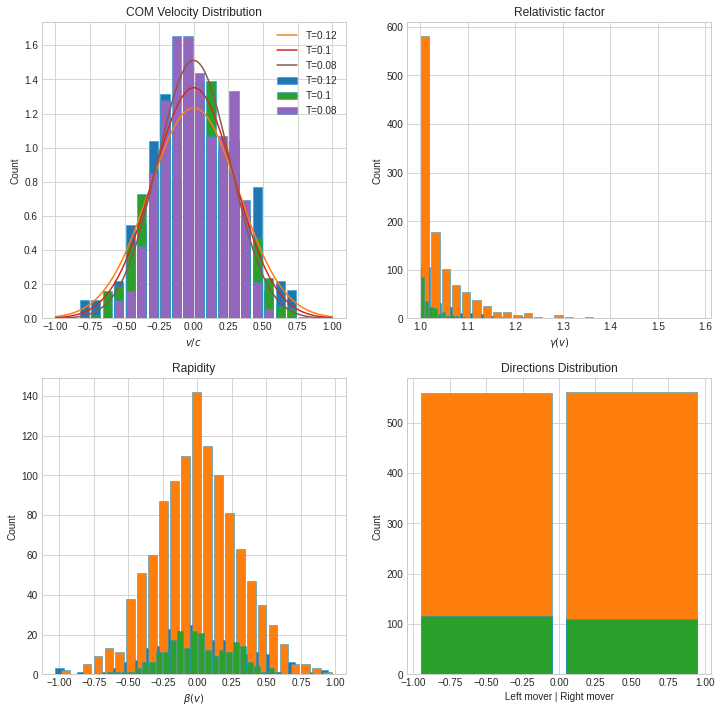

In [13]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
plt.style.use('seaborn-whitegrid') # nice and clean grid
for tmp, temp in enumerate(Tlist[:3]):
    
    ph0 = phi0List[tmp]
    all_vels = np.load(velocities_bubbles_file(nLat, lamb, ph0, temp)+'.npy')
    xlist     = np.linspace(-1.,1.,1000)
    mu        = 0.
    sigma1     = (2.*temp/(Esph*ph0**2.))**0.5
    sigma2     = (2.*temp/(Eemp*ph0**2.))**0.5
    print(np.sqrt(w2(m2eff)[0]), temp, Esph, sigma1, sigma2)

    nB = 25
    slots = np.linspace(-1., 1., nB)
    ax[0,0].hist(all_vels, bins=slots, density=True, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5, label='T='+str(temp))
    ax[0,0].plot(xlist, scp.stats.norm.pdf(xlist, mu, sigma1), label='T='+str(temp))
    #ax[0,0].plot(xlist, scp.stats.norm.pdf(xlist, mu, sigma2))
    ax[0,0].set_title('COM Velocity Distribution')
    ax[0,0].set_xlabel(r'$v/c$')
    ax[0,0].legend()

    ax[0,1].hist(gamma(all_vels), bins=nB, density=False, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5)
    ax[0,1].set_title('Relativistic factor')
    ax[0,1].set_xlabel(r'$\gamma(v)$')

    ax[1,0].hist(rapidity(all_vels), bins=nB, density=False, rwidth=0.8,  edgecolor='#169acf', linewidth=0.5)
    ax[1,0].set_title('Rapidity')
    ax[1,0].set_xlabel(r'$\beta(v)$')

    ax[1,1].hist(np.sign(all_vels), bins=2, density=False, rwidth=0.9,  edgecolor='#169acf', linewidth=0.5)
    ax[1,1].set_title('Directions Distribution')
    ax[1,1].set_xlabel(r' Left mover | Right mover ')

    for axx in ax.flatten(): axx.set_ylabel('Count')
plt.savefig('./data/vacuum_vels_temp'+str('%.4f'%temp)+'.pdf')
plt.show()


3


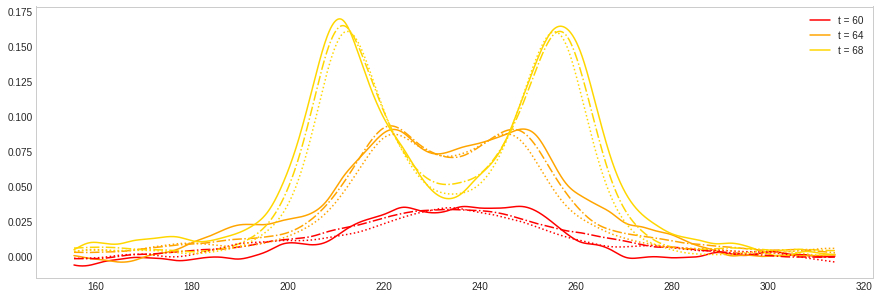

In [52]:
# Compare profiles

timesList = np.arange(60, 70, 4)
print(len(timesList))

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
lss = cycle(['-', '-.', ':'])
bool = True
for b, bub in enumerate(bubbleList):
    cols = cycle(['red', 'orange', 'gold', 'darkgreen', 'blue', 'darkblue', 'purple', 'violet'])
    ls = next(lss)
    for tt in timesList:
        data   = bub[0,1,tt]
        xlist  = np.linspace(0., len(data), len(data))*dx

        phi_spline = scp.interpolate.splrep(xlist, data)
        r          = np.linspace(xlist[50], xlist[-50], 2000)
        phi        = scp.interpolate.splev(r, phi_spline)

        col=next(cols)
        if bool:
            plt.plot(r, phi, color=col, ls=ls, label='t = '+str(tt))
        else:
            plt.plot(r, phi, color=col, ls=ls)

    bool = False
plt.legend(); plt.grid(); plt.show()


7


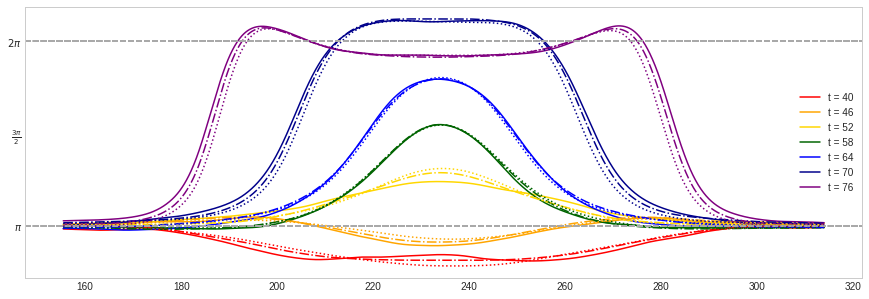

In [28]:
# Compare profiles

timesList = np.arange(40, 80, 6)
print(len(timesList))

fig, ax = plt.subplots(1, 1, figsize = (15, 5))
lss = cycle(['-', '-.', ':'])
bool = True
for b, bub in enumerate(bubbleList):
    cols = cycle(['red', 'orange', 'gold', 'darkgreen', 'blue', 'darkblue', 'purple', 'violet'])
    ls = next(lss)
    for tt in timesList:
        data   = bub[0,0,tt]
        xlist  = np.linspace(0., len(data), len(data))*dx

        phi_spline = scp.interpolate.splrep(xlist, data)
        r          = np.linspace(xlist[50], xlist[-50], 2000)
        phi        = scp.interpolate.splev(r, phi_spline)

        col=next(cols)
        if bool:
            plt.plot(r, phi, color=col, ls=ls, label='t = '+str(tt))
        else:
            plt.plot(r, phi, color=col, ls=ls)

        plt.axhline(phieq, color='darkgray', ls='--')
        plt.axhline(2.*np.pi, color='darkgray', ls='--') 
        ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
        ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    bool = False
plt.legend(); plt.grid(); plt.show()


3.141592653589793


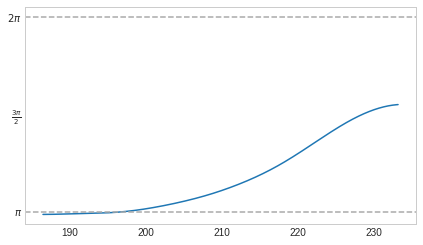

In [59]:
# interpolate mean field
# take tangent to this curve
# take tangent to tangent curve

slice  = 58 #78

data   = bubbleList[0][0,0,slice]
data   = data + np.abs(data[0]-phieq); print(data[0])
#data   = gaussian_filter(data, sigma=2, mode='nearest')
xlist  = np.linspace(0., len(data), len(data))*dx

phi_spline       = scp.interpolate.splrep(xlist, data)
dphidr_spline    = scp.interpolate.splder(phi_spline, n=1)
ddphiddr_spline  = scp.interpolate.splder(dphidr_spline, n=1)

r         = np.linspace(xlist[60], xlist[len(xlist)//2], 2000)
phi       = scp.interpolate.splev(r, phi_spline)
dphidr    = scp.interpolate.splev(r, dphidr_spline)
ddphiddr  = scp.interpolate.splev(r, ddphiddr_spline)

fig, ax = plt.subplots(1, 1, figsize = (7, 4))
plt.plot(r,phi)
plt.axhline(phieq, color='darkgray', ls='--')
plt.axhline(2.*np.pi, color='darkgray', ls='--') 
ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.grid(); plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


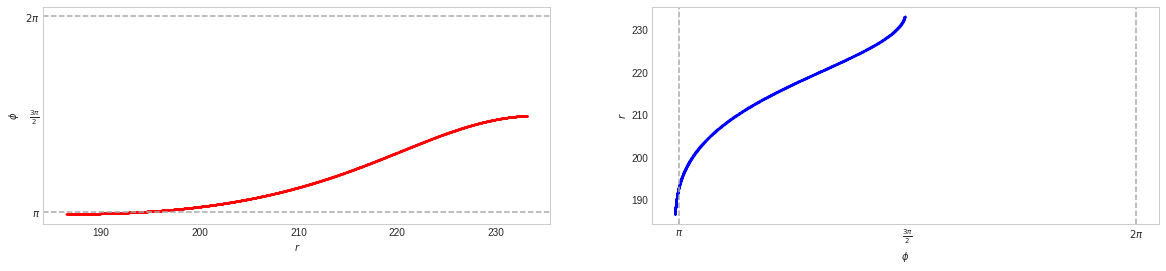

In [49]:
# invert \phi(r) into r(\phi)
phiinv = phi[::-1]
rinv = np.zeros(phiinv.shape)

profile = intp.interp1d(r, phi, kind='linear')
diff = lambda x, a: (profile(x) - a)**2.
for idx, x_value in enumerate(phiinv):
    res = sco.minimize_scalar(diff, args=(x_value), bounds=(min(r), max(r)), method='Bounded')
    rinv[idx] = res.x

fig, ax = plt.subplots(1, 2, figsize = (20, 4))
ax[0].plot(r, phi, 'ro', ms=1)
ax[1].plot(phiinv, rinv, 'bo', ms=1)

ax[0].axhline(phieq, color='darkgray', ls='--')
ax[0].axhline(2.*np.pi, color='darkgray', ls='--') 
ax[1].axvline(phieq, color='darkgray', ls='--')
ax[1].axvline(2.*np.pi, color='darkgray', ls='--') 
ax[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax[1].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\phi$')
ax[1].set_ylabel(r'$r$')
ax[1].set_xlabel(r'$\phi$')
for axx in ax:
    axx.legend(); axx.grid()
plt.show()



In [43]:
# integrate product of derivatives above to get potential function of r
dVdr          = scp.interpolate.splrep(r, dphidr*ddphiddr + dphidr**2./r)
Vofr_spline   = scp.interpolate.splantider(dVdr, n=1)
Vofrofphi     = scp.interpolate.splev(rinv, Vofr_spline)


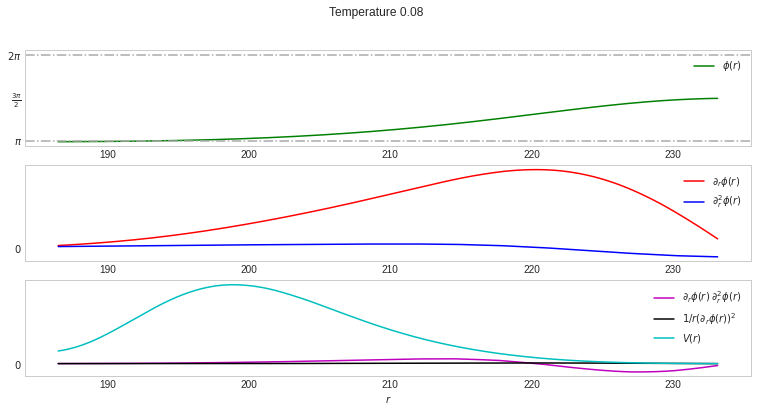

In [44]:
fig, ax = plt.subplots(3, 1, figsize = (13, 6))
ax[0].plot(r, phi, 'g-', ms=1, label=f'$\phi(r)$')
ax[1].plot(r, dphidr, 'r-', label=f'$\partial_r \phi(r)$')
ax[1].plot(r, ddphiddr, 'b-', label=f'$\partial_r^2 \phi(r)$')
ax[2].plot(r, dphidr*ddphiddr, 'm-', label=f'$\partial_r \phi(r) \; \partial_r^2 \phi(r)$')
ax[2].plot(r, dphidr**2./r, 'k-', label=f'$1/r(\partial_r \phi(r))^2$')
ax[2].plot(r, Vofrofphi, 'c-', label=f'$V(r)$')

ax[0].axhline(phieq, color='darkgray', ls='-.')
ax[0].axhline(2.*np.pi, color='darkgray', ls='-.')
plt.suptitle('Temperature '+str(temp))
for axx in ax:
    axx.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    axx.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    axx.set_xlabel(r'$r$')
    axx.legend(); axx.grid()
plt.show()


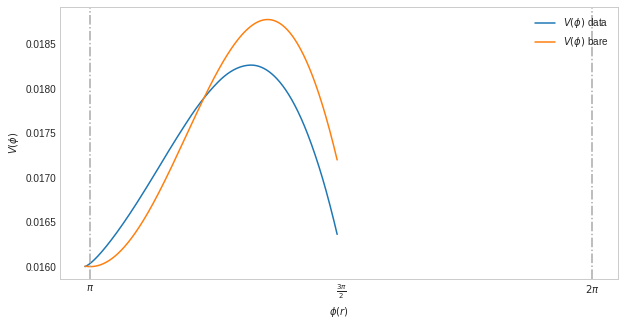

In [45]:
vector_data    = np.asarray([Vofrofphi, -V(phiinv)])
vector_data[0] = vector_data[0] - V(phieq)


fig, ax = plt.subplots(1, 1, figsize = (10, 5))
plt.plot(phiinv, vector_data[0], label=f'$V(\phi)$ data')
plt.plot(phiinv, vector_data[1], label=f'$V(\phi)$ bare')
ax.axvline(phieq, color='darkgray', ls='-.')
ax.axvline(2.*np.pi, color='darkgray', ls='-.')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.xlabel(f'$\phi(r)$'); plt.ylabel(f'$V(\phi)$')
plt.grid(); plt.legend(); plt.show()



1.415744835038749 0.008106749478365458
1.5 0.008


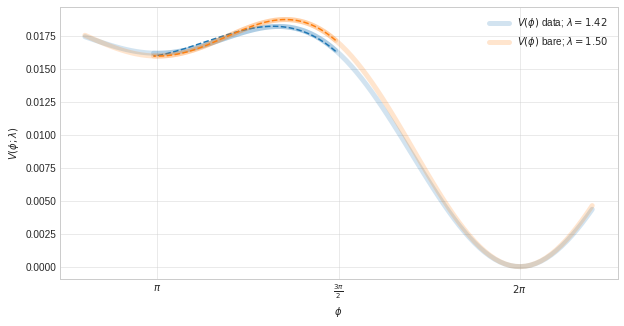

In [46]:
#def fit_to_V(x, m2, lam):
#    return 0.5*m2 * x**2. + lam/24. * x**4.
def fit_to_V(x, lam, a):
    return (-np.cos(x) + 0.5*lam**2. * np.sin(x)**2. + 1.) * a

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
for j, curve in enumerate(vector_data):
    col = next(colors)

    xss = (phiinv if j==0 else phiinv)
    popt, pcov = scp.optimize.curve_fit(fit_to_V, xss, curve)
    print(*popt)
    
    lab = r'$V(\phi)$ '+['data', 'bare'][j]+r'; $\lambda = %5.2f$'%(popt[0])
    plt.plot(xss, fit_to_V(xss, *popt), color=col, label=lab, linewidth=5, alpha=0.2)
    plt.plot(xss, curve, color=col, ls='--')

    backgroundV = np.linspace(phieq*0.8, 2.*np.pi*1.1, 100)
    plt.plot(backgroundV, fit_to_V(backgroundV, *popt), color=col, linewidth=5, alpha=0.2)#, label='extended curve from fit params')

plt.legend()
plt.grid(alpha=0.5)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi;\lambda)$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.savefig('./data/reconstructed_potential_temp'+str('%.4f'%temp)+'.pdf')
plt.show()